In [1]:
import tensorflow

In [2]:
tensorflow.test.is_gpu_available()

True

In [3]:
tensorflow.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:DML:0', device_type='DML'),
 PhysicalDevice(name='/physical_device:DML:1', device_type='DML')]

## Faces Classification dataset
* Using deep Learning to Identify Humans Faces and predict Gender through identified Faces

In [4]:
from tensorflow.keras.preprocessing import image
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
from imutils import paths
import cv2
import os
import random
import seaborn as sns


print(f'current tensorflow version is {tf.__version__}')

current tensorflow version is 1.15.5


In [7]:
import wandb
wandb.init()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:  ········································


wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\user/.netrc


In [8]:
#Listing path to our image dataset directory
image_path = list(paths.list_images('./Desktop/Training/'))
image_path[0]

'./Desktop/Training/0\\063429.jpg.jpg'

In [9]:
width = 80
height = 80
size = [height, width]
def get_img_array(dir):
    """"
    A function which loops through a given directory, reads and convert an image to array. Then normalises the array and returns normalised array 
    and binary labels
    """
    labels_arr= np.empty(shape=[0,1])
    processed_list = []
    for num in range(0,2):
        image_list = [img for img in os.listdir(dir + '/' + str(num)) if img.endswith('.jpg')]
        for img_name in range(0,len(image_list)):
            loaded_image = image.load_img(dir + '/'+ str(num) + '\\' + str(image_list[img_name]), grayscale = False)
            process_img = image.img_to_array(loaded_image)
            process_img = cv2.resize(process_img, dsize = size, interpolation = cv2.INTER_AREA)
            process_img = (process_img/255)
            process_img_np = np.asarray(process_img)
            processed_list.append(process_img_np)
        labels = np.full((len(image_list),1),num)
        labels_np = np.asarray(labels)
        labels_arr= np.concatenate((labels_arr, labels_np))
    return processed_list, labels_arr

In [10]:
# unpacking shuffled tuble
image_array, label_array = get_img_array('./Desktop/Training')

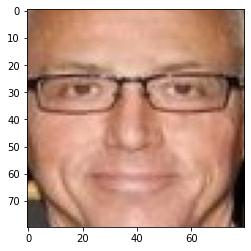

In [11]:
plt.imshow(image_array[100]);

In [12]:
def class_names(data):
    for i in data:
        if i == [0.]:
            return 'male'
        elif i == [1.]:
            return 'female'
    return i

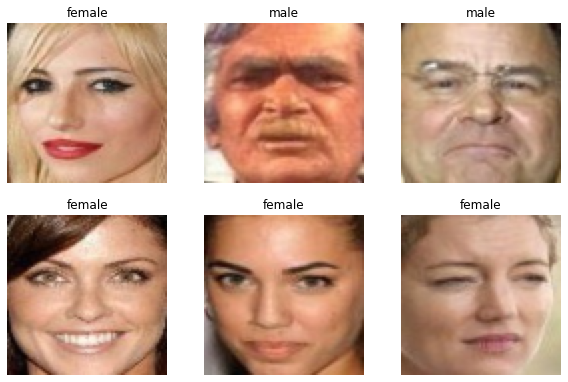

In [13]:
# Plot multiple random images of our dataset
import random
#random.shuffle(files)
random.seed(42)
plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(3, 3, i + 1)
  rand_index = random.choice(range(len(image_array)))
  plt.imshow(image_array[rand_index])
  plt.title(class_names(label_array[rand_index]))
  plt.axis(False);

In [14]:
image_array = np.array(image_array)
label_array = np.array(label_array)

In [15]:
#reshaping arrays to fit into deep learning algorithm.
label_array.shape, image_array.shape

((29051, 1), (29051, 80, 80, 3))

In [17]:
## Creating EarlyStopping Call Backs
random.seed(30)
early_callback = tf.keras.callbacks.EarlyStopping(monitor = 'acc', patience = 3)

#Compiling deep learning neural network
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (80, 80, 3)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

#Compiling neutral network
model.compile(loss = tf.keras.losses.binary_crossentropy, 
              optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

#Fitting neural network
History = model.fit(image_array, label_array, epochs =30, callbacks = [early_callback], verbose = True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 29051 samples
Epoch 1/30
29051/29051 [==============================] - 9s 299us/sample - loss: 0.3423 - acc: 0.8557
Epoch 2/30
29051/29051 [==============================] - 7s 241us/sample - loss: 0.2705 - acc: 0.8906
Epoch 3/30
29051/29051 [==============================] - 7s 250us/sample - loss: 0.2471 - acc: 0.9008
Epoch 4/30
29051/29051 [==============================] - 7s 238us/sample - loss: 0.2459 - acc: 0.9021
Epoch 5/30
29051/29051 [==============================] - 7s 251us/sample - loss: 0.2253 - acc: 0.9102
Epoch 6/30
29051/29051 [==============================] - 7s 244us/sample - loss: 0.2293 - acc: 0.9094
Epoch 7/30
29051/29051 [==============================] - 7s 228us/sample - loss: 0.2124 - acc: 0.9156
Epoch 8/30
29051/29051 [==============================] - 7s 252us/sample - loss:

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                192010    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 192,131
Trainable params: 192,131
Non-trainable params: 0
_________________________________________________________________


In [19]:
learning_curve = pd.DataFrame(History.history)

In [20]:
learning_curve.head()

,loss,acc
0,0.342288,0.855736
1,0.270515,0.890606
2,0.247053,0.900795
3,0.245939,0.902103
4,0.225285,0.910158


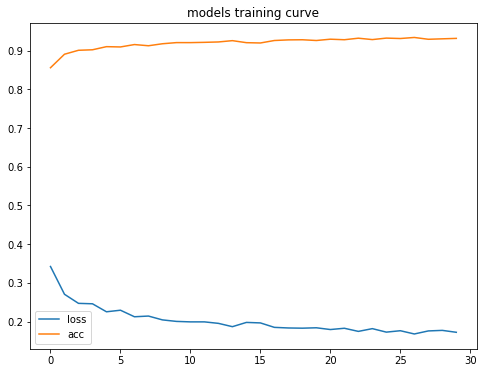

In [21]:
plt.figure(figsize =(8, 6))
plt.plot(learning_curve)
plt.legend(learning_curve)
plt.title('models training curve');

In [22]:
#Making predictions with our model on the test data.
# unpacking shuffled tuble
val_image, val_array = get_img_array('./Desktop/Validation')

In [23]:
val_image = np.array(val_image)
val_array = np.array(val_array)

In [24]:
model_prediction = model.predict(val_image)

#viewing our model first 5 prediction
model_prediction = model_prediction.round()
model_prediction = np.asarray(model_prediction, dtype = 'float64')

In [25]:
#using confusion to check algorithm metrics
from sklearn.metrics import confusion_matrix

#Measuring metrics using confusion metrics.
confusion_matrix(val_array, model_prediction)

array([[5191,  617],
       [ 314, 5527]], dtype=int64)

In [26]:
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

  # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
  # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [27]:
classes = ['male', 'female']

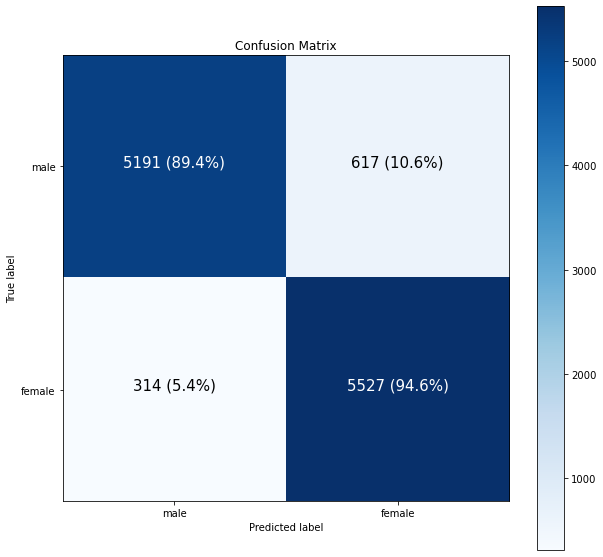

In [28]:
make_confusion_matrix(val_array, model_prediction, classes)

## Viewing Predictions on our dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


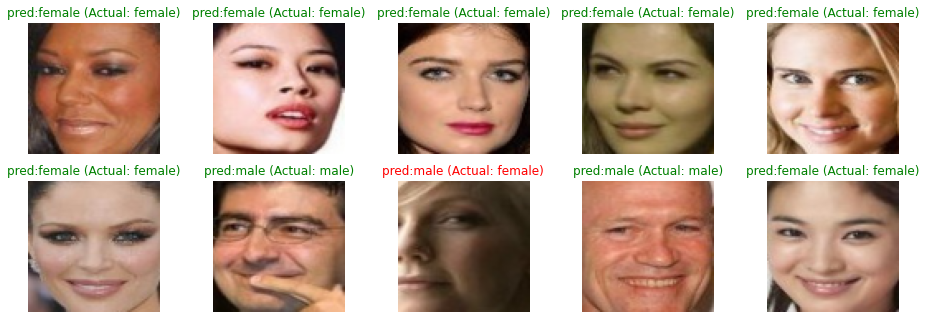

In [37]:
# Viewing the predicted Value
import random
random.seed(92)
#random.shuffle(files)
plt.figure(figsize=(16,14))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)
    rand_index = random.choice(range(len(val_image)))
    # Change the color of the titles depending on if the prediction is right or wrong
    if model_prediction[rand_index] == label_array[rand_index]:
        color = 'green'
    else:
        color = 'red'
    
    classes = np.asarray(class_names(val_array[rand_index]))
    pred_label = np.asarray(class_names(model_prediction[rand_index]))
    
    plt.imshow(val_image[rand_index])
    #plt.title(f'prediction: {class_names(model_prediction[rand_index])}', color = color)
    plt.title("pred:{} (Actual: {})".format(pred_label,
                                    classes),
                                    color=color)
    plt.axis(False);

### Predicted Images
The Algorithm predicted 11 images correctly and 1 image wrong from the 12 randomly selected sample

### Saving the model

In [71]:
import datetime
def save_model(model, suffix=None):
    modeldir = os.path.join("./Desktop/ml_model",
                          datetime.datetime.now().strftime('%Y-%m-%d'))
    model_path = modeldir + "-" + suffix + ".h5" # save format of model
    print(f"Saving model to: {model_path}...")
    model.save(model_path)
    return model_path

In [72]:
save_model(model, suffix="deep-faces-Adam")

Saving model to: ./Desktop/ml_model\2021-12-29-deep-faces-Adam.h5...


'./Desktop/ml_model\\2021-12-29-deep-faces-Adam.h5'